In [8]:
import numpy as np
from scipy import signal
from scipy import linalg
from scipy.io import wavfile
import scipy.io
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

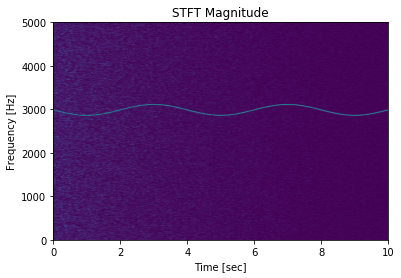

array([-15.24402788,  -9.00041643,   8.837721  , ...,  -0.82919569,
        -1.99191868,   1.22222134])

In [9]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),
                         size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
x

In [10]:
def mic_sig(N, fs, fc, fm, fd):
    
    t = np.arange(N) / fs
    
    x = np.exp(1.j*(2.*np.pi*fc*t + fd/fm*np.sin(2.*np.pi*fm*t)))
    
    return x


def get_sig(N, fs, fc, fm, fd):

    n = np.arange(N)
    t = n/fs

    if fc is None:
        fc = fs/4.

    ph0 = np.random.random() * 2. * np.pi
    ph = ph0 + 2.0*np.pi*fc*t + fd/fm * np.cos(2.0*np.pi*fm*t)
    x = np.cos(ph)

    return x

In [11]:
fs = int(5e6)
fc = int(-1e6)
fm = int(3.9e3)
fd = int(15e3)
N = 1024

signal = mic_sig(1024, fs=fs, fc=fc, fm=fm, fd=fd)
x

array([-15.24402788,  -9.00041643,   8.837721  , ...,  -0.82919569,
        -1.99191868,   1.22222134])

In [13]:
f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'stft'